Converged: True
[[2.55241999e-02 9.68663954e-01 5.81184599e-03]
 [9.76281930e-01 2.37180696e-02 9.52946672e-36]
 [1.20077135e-01 8.79922865e-01 2.74275263e-11]
 ...
 [2.83876529e-03 2.52122588e-01 7.45038647e-01]
 [1.80299832e-01 8.19700168e-01 4.87925921e-11]
 [1.31992273e-02 7.51924284e-01 2.34876489e-01]]
[1 0 1 ... 2 1 1]
[0.12363821 0.42669658 0.44966521]
5.262463046398012
[1 0 1 ... 2 1 1]


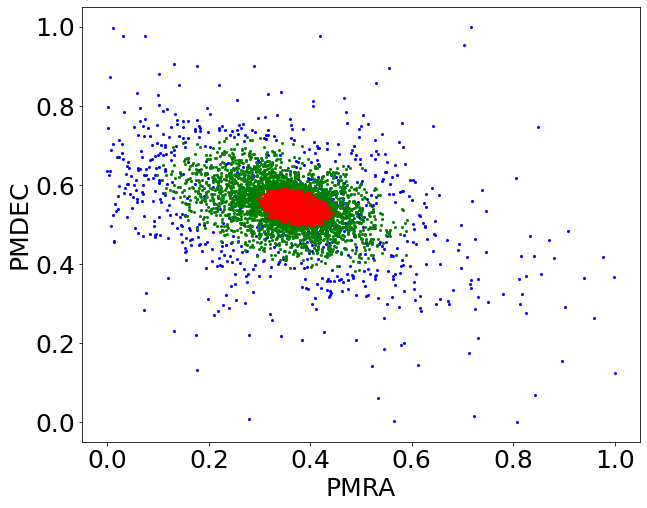

In [5]:
#importing required libraries
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from astropy.io import ascii

data1  = pd.read_csv("gaia_data1.2.csv", header=0,usecols=[0,1,2,3,4]) #loading the CSV data
#pmra,pmdec,parallax,ra,dec
#print(data.describe())


scaler = preprocessing.MinMaxScaler()
names = data1.columns
d = scaler.fit_transform(data1)
data = pd.DataFrame(d, columns=names)
data.head()
GM = GaussianMixture(n_components=3 , init_params='random', max_iter=800,tol=1e-6) #Defining our model
GM.fit(data)

print('Converged:',GM.converged_) # Check if the model has converged
means = GM.means_ 
covariances = GM.covariances_


print(GM.predict_proba(data))
print (GM.predict(data))
print (GM.weights_)
print (GM.score(data))
proba = GM.predict_proba(data) # The probability of a star being a member of a particular cluster

#proba.to_csv('proba.csv', mode = 'w', sep='\t', index=False, header=False)

ascii.write (proba, 'proba.csv',format='tab')


#predicting the clusters
labels = GM.predict(data)
print(labels)
ascii.write (labels, 'predict.csv',format='tab')
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = [0,1,2,3,4, 'cluster']
frame.to_csv('frame.csv', mode = 'w', sep=',', index=False, header=False)


color=['blue','green','red']
for k in range(0,3):
    data = frame[frame["cluster"]==k]
    #plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 25})    
    plt.scatter(data[0],data[1],c=color[k],s=4)
    plt.gcf().set_size_inches((10, 8)) 
    plt.xlabel("PMRA")
    plt.ylabel("PMDEC")
plt.savefig("GMM_clustering.png",dpi=300, bbox_inches='tight')
plt.show()


#user_cols =['pmra','pmdec','parallax','ra','dec','source_id','ra_error','dec_error','parallax_error','pm','pmra_error','pmdec_error','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','bp_g','g_rp','dr2_radial_velocity','dr2_radial_velocity_error']
final2 = pd.read_csv('gaia_data1.2.csv', header=0, usecols=[0,1,2,3,4])
#final2.head()
final2['cluster'] = labels
final2['prob1'] = proba[:,0]
final2['prob2'] = proba[:,1]
final2['prob3'] = proba[:,2]

final2.to_csv('Cluster_GMM_result.csv', mode = 'w', sep=',', index=False) 